# Problem Statement
### In this case study, we examine the Housing Prices in California to figure out what factors influence prices the most. The inteligence will be relevant for the companies to determine the income of the household, which can then be utilized to incorporate targeted ads.


### Link to Dataset - https://www.kaggle.com/camnugent/california-housing-prices

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import express as px
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [ ]:
pd.set_option('max.column', None)

In [ ]:
data = pd.read_csv("CaliDataset.csv")

# Data Exploration

In [ ]:
#list down the columns
data.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

*   Let's check the random ten number of data samples, so we can easly understand the behaviour and what types of data type stored in particular features.




In [ ]:
#list down random samples of data
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13014,-121.17,38.69,5.0,7138.0,1227.0,2623.0,1139.0,5.6902,243200.0,INLAND
5906,-118.43,34.30,28.0,271.0,61.0,246.0,62.0,1.7062,164600.0,<1H OCEAN
4327,-118.33,34.08,52.0,1777.0,454.0,671.0,439.0,3.5083,500001.0,<1H OCEAN
17259,-119.72,34.42,31.0,1524.0,383.0,1257.0,398.0,2.6019,250000.0,NEAR OCEAN
8208,-118.17,33.79,32.0,2171.0,672.0,3002.0,648.0,2.3750,139700.0,NEAR OCEAN
16599,-120.70,35.76,15.0,1914.0,425.0,1130.0,421.0,2.2165,90600.0,<1H OCEAN
19045,-121.82,38.46,10.0,6331.0,1181.0,3419.0,1110.0,3.7083,154800.0,INLAND
2442,-119.61,36.57,42.0,2242.0,521.0,1359.0,483.0,1.5833,65100.0,INLAND
11741,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,128100.0,INLAND
6258,-117.96,34.05,36.0,1475.0,270.0,1149.0,284.0,3.0904,158600.0,<1H OCEAN


*   Target Feature

In [ ]:
#adding target_feature to Y
TARGET_FEATURE = 'median_house_value'

Y = data[TARGET_FEATURE]

Y.head(10)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64

In [ ]:
#gives information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB




As we can see in the output.

1.    There are 20640 entries
2.    There are total 10 features (0 to 9)
3.    There are two types of datatype dtypes: float64(8) and object(1)
5.    Also, we can check how many missing values are there in the Non-Null Count column. We can observe that one column has missing values. (total_bedrooms)



In [ ]:
#desribes the dataset. gives count, mean, std and box plot values
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*   Here, describe() method provides us the complete calculations details about the dataset. i.e. let's take the price feature for example. It shows the what's the min, max, mean(average) and std(standard deviation) of price feature.

*   Numerical Features

In [ ]:
numeric_features = data.select_dtypes(['int', 'float']).columns
numeric_features , len(numeric_features)

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'), 9)

*   Categorical Features

In [ ]:
categorical_features = data.select_dtypes('object').columns
categorical_features, len(categorical_features)

(Index(['ocean_proximity'], dtype='object'), 1)

In [ ]:
print("Number of 'Numerical' Features are:", len(numeric_features) )
print("Number of 'Categorical' Features are:", len(categorical_features) )

Number of 'Numerical' Features are: 9
Number of 'Categorical' Features are: 1


# Data Pre-Processing

Text(0, 0.5, 'Count')

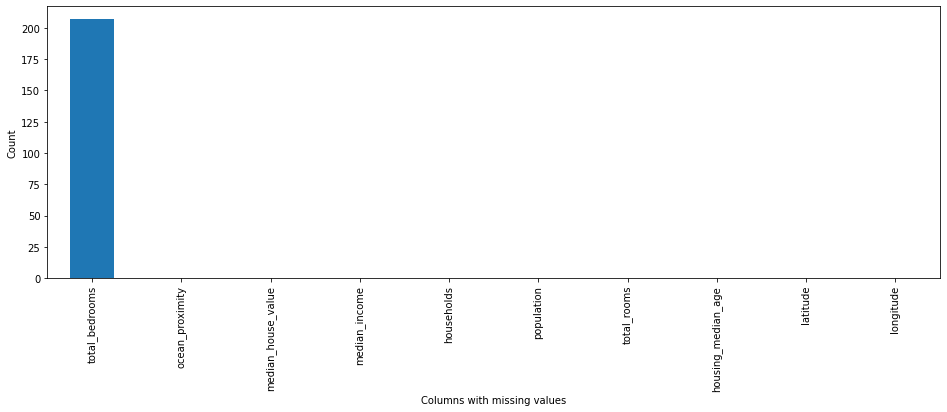

In [ ]:
missing = data.isna().sum().sort_values(ascending=False)
missing.plot.bar(figsize=(16,5))
plt.xlabel('Columns with missing values')
plt.ylabel('Count')

In [ ]:
missing

total_bedrooms        207
ocean_proximity         0
median_house_value      0
median_income           0
households              0
population              0
total_rooms             0
housing_median_age      0
latitude                0
longitude               0
dtype: int64

*    In above output, We can clearly see that, There is only one value (total_bedrooms) that has null values. So we have to fill some statastical values.

*   Filling Missing Values

In [ ]:
data[['total_bedrooms']].describe(include='all')

,total_bedrooms
count,20433.000000
mean,537.870553
std,421.385070
min,1.000000
25%,296.000000
50%,435.000000
75%,647.000000
max,6445.000000


*   As we can see there is only one feature that has categorical values and rest all have numerical features.

In [ ]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mode()[0])
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

*   All missing values are filled.

*   Getting total number of unique values and removing columns which have huge number of unique values.

In [ ]:
print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 20640
Total Unique Records of ocean_proximity = 5


*   Now, we convert categorical values into numerical values.

In [ ]:
data[categorical_features].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in categorical_features:
    l_encoder = LabelEncoder()
    data[column] = l_encoder.fit_transform(data[column])

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


In [ ]:
training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('median_house_value')

# Final list of Training Features
training_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

*   Now, we use MinMaxScaler to normalize our dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxNorm = MinMaxScaler()
minMaxNorm.fit(data[training_features])
X = minMaxNorm.transform(data[training_features]) 
X

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.02055583, 0.53966842,
        0.75      ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.18697583, 0.53802706,
        0.75      ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02894261, 0.46602805,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07104095, 0.08276438,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.05722743, 0.09429525,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.08699227, 0.13025338,
        0.25      ]])

In [ ]:
Y = data['median_house_value']  
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

###   Prediction is the data mining task which is needed to solve the problem statement, as we need to predict the house of a price based on several factors like its location, number of bedroom, etc,. As we need to predict a specific price and not a price range, classification is not the major task.

*   Splitting Train and Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
print("Total size: ", data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  20640
Train size:  (16512, 9) (16512,)
Test size:  (4128, 9) (4128,)


In [ ]:
models_summary = pd.DataFrame([],
                              columns=['Model_name', 
                                       'Prediction_Score',
                                       'Mean_Absolute_error'
                                      ])
models_summary

,Model_name,Prediction_Score,Mean_Absolute_error


In [ ]:
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
ADB_model = AdaBoostRegressor(n_estimators=400, learning_rate=0.25)
ADB_model.fit(train_X,train_Y)
y_train = ADB_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_adb_predict = ADB_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_adb_predict)))
score = ADB_model.score(test_X, test_Y)
score

The train accuracy score : 0.38510724399721463 
The test accuracy score : 0.37805881781154904 


0.37805881781154904

In [ ]:
mae = mean_absolute_error(test_Y, y_adb_predict)
models_summary = models_summary.append({
    'Model_name': ADB_model.__class__.__name__,
    'Prediction_Score': r2_score(test_Y, y_adb_predict),
    'Mean_Absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
0,AdaBoostRegressor,0.378059,78527.783462


In [ ]:
Dtree_model = DecisionTreeRegressor(random_state=1, max_depth=6, min_samples_split=6)
Dtree_model.fit(train_X, train_Y)
y_train = Dtree_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_dtree_predict = Dtree_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_dtree_predict)))

The train accuracy score : 0.6946824987893929 
The test accuracy score : 0.6596631950247303 


In [ ]:
models_summary = models_summary.append({
    'Model_name': Dtree_model.__class__.__name__,
    'Prediction_Score': r2_score(test_Y, y_dtree_predict),
    'Mean_Absolute_error' : mean_absolute_error(test_Y, y_dtree_predict)
}, ignore_index=True)

models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
1,DecisionTreeRegressor,0.659663,46746.006450
0,AdaBoostRegressor,0.378059,78527.783462


In [ ]:
GBR_model = GradientBoostingRegressor(n_estimators=250, random_state=1, learning_rate=0.27, max_depth=6, min_samples_split=6)
GBR_model.fit(train_X, train_Y)
y_train = GBR_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_gbr_predict = GBR_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_gbr_predict)))

The train accuracy score : 0.9702968116101536 
The test accuracy score : 0.8282769386842936 


In [ ]:
models_summary = models_summary.append({
    'Model_name': GBR_model.__class__.__name__,
    'Prediction_Score': r2_score(test_Y, y_gbr_predict),
    'Mean_Absolute_error' : mean_absolute_error(test_Y, y_gbr_predict)
}, ignore_index=True)

models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
2,GradientBoostingRegressor,0.828277,31304.486244
1,DecisionTreeRegressor,0.659663,46746.006450
0,AdaBoostRegressor,0.378059,78527.783462


In [ ]:
RFR_model = RandomForestRegressor(random_state=1,n_estimators=250, max_depth=18, min_samples_split=4)
RFR_model.fit(train_X, train_Y)
y_train = RFR_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_rfr_predict = RFR_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_rfr_predict)))

The train accuracy score : 0.9621466176246058 
The test accuracy score : 0.8166412832738121 


In [ ]:
models_summary = models_summary.append({
    'Model_name': RFR_model.__class__.__name__,
    'Prediction_Score': r2_score(test_Y, y_rfr_predict),
    'Mean_Absolute_error' : mean_absolute_error(test_Y, y_rfr_predict)
}, ignore_index=True)

models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
2,GradientBoostingRegressor,0.828277,31304.486244
3,RandomForestRegressor,0.816641,32014.729639
1,DecisionTreeRegressor,0.659663,46746.006450
0,AdaBoostRegressor,0.378059,78527.783462


In [ ]:
XGBR_model = XGBRegressor(n_estimators=300, learning_rate=0.15, max_depth=6)
XGBR_model.fit(train_X, train_Y)
y_train = XGBR_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_xgbr_predict = XGBR_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_xgbr_predict)))

[19:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The train accuracy score : 0.9558085903401108 
The test accuracy score : 0.8348795673033752 


In [ ]:
models_summary = models_summary.append({
    'Model_name': XGBR_model.__class__.__name__,
    'Prediction_Score': r2_score(test_Y, y_xgbr_predict),
    'Mean_Absolute_error' : mean_absolute_error(test_Y, y_xgbr_predict)
}, ignore_index=True)

models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
4,XGBRegressor,0.834880,30715.403834
2,GradientBoostingRegressor,0.828277,31304.486244
3,RandomForestRegressor,0.816641,32014.729639
1,DecisionTreeRegressor,0.659663,46746.006450
0,AdaBoostRegressor,0.378059,78527.783462


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xgbr_model = XGBRegressor() # {'objective': 'reg:squarederror' }

params = {
    'n_estimators': [110, 120, 130, 140], 
    'learning_rate': [ 0.05, 0.075, 0.1],
    'max_depth': [ 7, 9],
    'reg_lambda': [0.3, 0.5]
}

xgb_reg = GridSearchCV(estimator=xgbr_model, param_grid=params, cv=5, n_jobs=-1)

xgb_reg.fit(train_X, train_Y)

xgbr_model_score = xgb_reg.best_score_

xgbr_model_pred = xgb_reg.predict(test_X)

mae = mean_absolute_error(test_Y, xgbr_model_pred)

print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)

print("mean_absolute_error :", mae)

[19:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: 0.828
Best parameters set: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.5}
mean_absolute_error : 30647.608274474624


In [ ]:
models_summary = models_summary.append({
    'Model_name': 'XGBRegressor_HyperParamsTunning',
    'Prediction_Score': xgbr_model_score,
    'Mean_Absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
4,XGBRegressor,0.834880,30715.403834
2,GradientBoostingRegressor,0.828277,31304.486244
5,XGBRegressor_HyperParamsTunning,0.827650,30647.608274
3,RandomForestRegressor,0.816641,32014.729639
1,DecisionTreeRegressor,0.659663,46746.006450
0,AdaBoostRegressor,0.378059,78527.783462


###  After trying the most used regressor models, we found the R2 score of XGB Regressor to be highest, which was further tuned more to improve the score to 0.834880, which is better as the closer the value of R2 score to 1 the better the prediction is.

# Data Visualisation

In [ ]:
import plotly.express as ex
ex.pie(data,names='ocean_proximity',title='Proportion of Locations of the house w.r.t ocean/sea')

We can see here that majority of the houses are close to the sea.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4179d4990>,
      dtype=object)

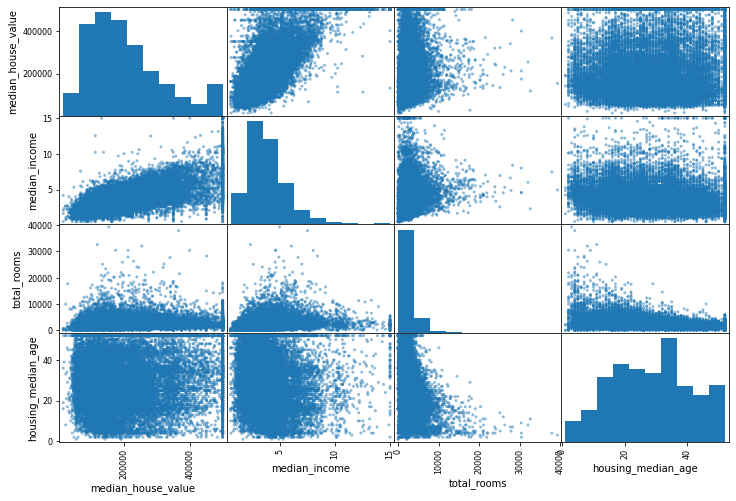

In [ ]:
from pandas.plotting import scatter_matrix
sct_features = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(data[sct_features],figsize=(12,8))

This visualization gives us an idea about the relation of median_house_value with other attributes.

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(1,2)
fig.add_trace(go.Histogram(x=data['median_house_value']),1,1)
fig.add_trace(go.Box(y=data['median_house_value'],boxpoints='all',line_color='orange'),1,2) 
fig.update_layout(height=500, showlegend=False,title_text="Median income distribution and Box Plot")

* The correlation matrix shows the relation between median_housing_value and Other Variables.

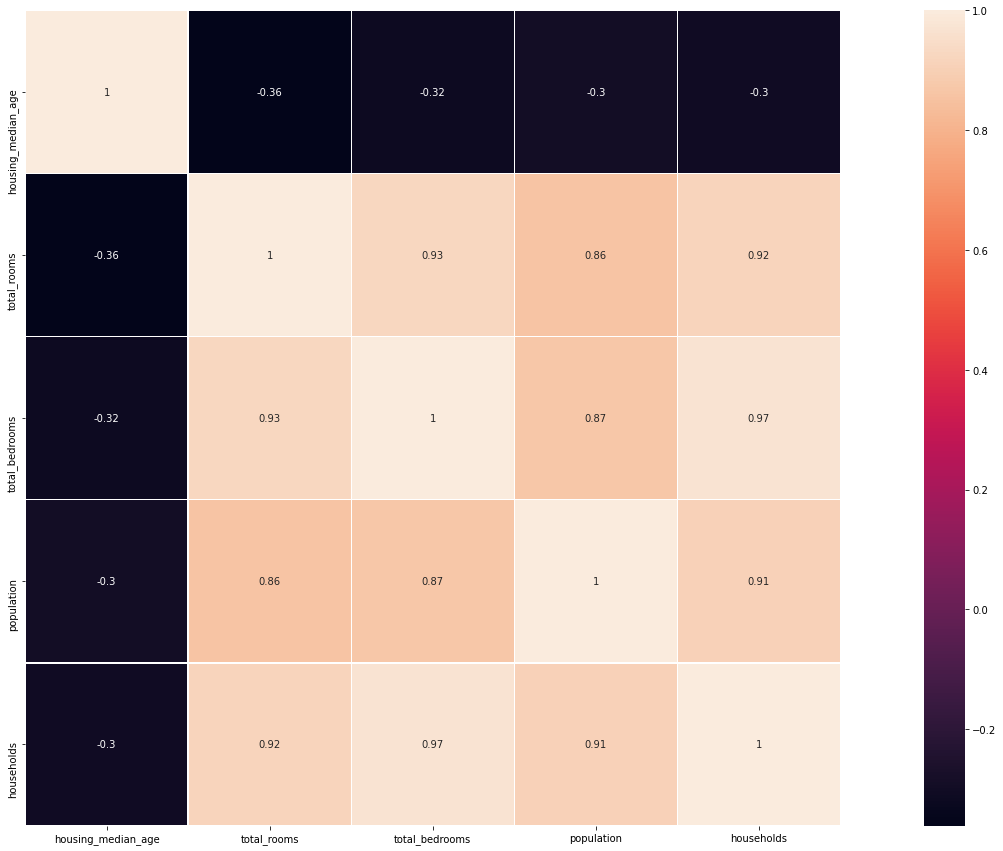

In [ ]:
corr_mat = data[['housing_median_age','total_rooms','total_bedrooms','population','households']].corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_mat, vmax=1 , square=True,annot=True,linewidths=.5);

Now, we plot the housing data with respect to the latitude and longitude given. With this, we come to know the population density and the median house vale, which we observe that they go hand-in-hand.

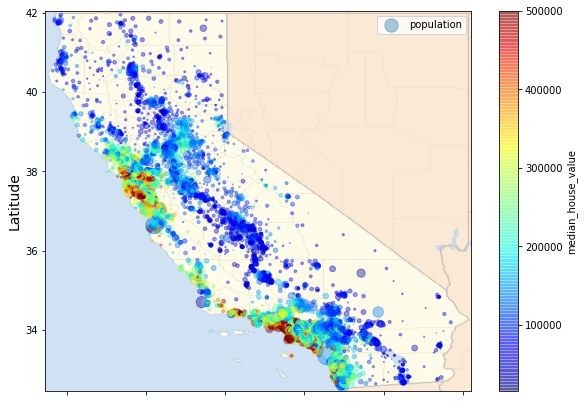

In [ ]:
import matplotlib.image as mpimg

california_img=mpimg.imread('./california.png')

housing_plot = data[['longitude','population','latitude','median_house_value']]
housing_plot.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=housing_plot['population']/100, label='population', figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

* It helps you to know the density by overlapping the circle if this area have a lot of house there, also other area that have small number of house will be appear because of its opacity will be low.

* Not just alpha, other parameters of the graph can help you discover more pattern



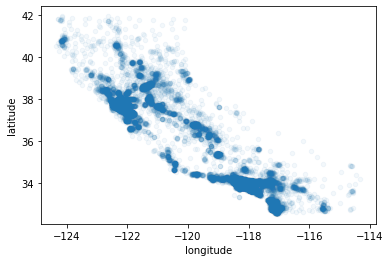

In [ ]:
data.plot(kind="scatter", x="longitude", y = "latitude", alpha=.05)

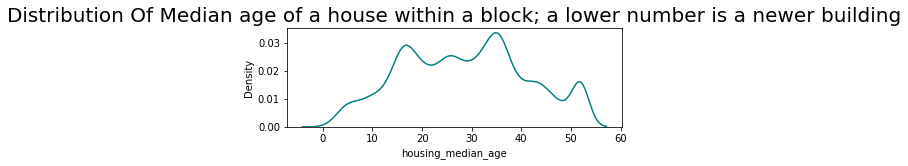

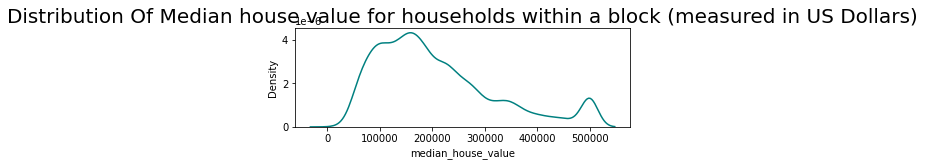

From the above plot we can see that both features follow a multimodal distribution, meaning we have underlaying groups in our data.

# Conclusion

The analysis gives us a detailed visualisation of the Median Housing Prices in California. We noticed that the major cities in California have a huge difference in median house price with respect to the inland counties. Most of the high price properties are located in promixity to the ocean. The age of the houses are also striking, which the analysis concludes that the median age hovers around 30-40 years. 

This detailed analysis will help advertisers to deliver targeted ads.